In [1]:
!pip install colorama
!pip install emoji --upgrade
!pip install contractions
!pip install nltk
!pip install -U scikit-learn
!pip install Keras-Preprocessing
!pip install wordcloud


# Sentiment Analysis Using Twitter Data

In [2]:
# the libraries that are required 

import pandas as pd
import numpy as np
import random 

from colorama import Fore, Back, Style
from IPython.display import HTML

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import plotly.express as px

import missingno as msno

import re
import emoji
import contractions
import nltk

import warnings
warnings.filterwarnings('ignore')
from nltk.tokenize import word_tokenize
nltk.download('punkt')
import string
from nltk.corpus import stopwords
nltk.download('stopwords')

from nltk.stem.snowball import SnowballStemmer

from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('wordnet')

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier as XGBoostClassifier
from sklearn.naive_bayes import BernoulliNB , GaussianNB

import seaborn as sn

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix




[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bhara\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bhara\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\bhara\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


**Data Loading**
---
Now we will use the datasets and read them using pandas library


In [3]:
#Using pandas to read training and testing data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
#sample part of test data
test.sample(10)

textID                                               text sentiment
2279  062ffc4f0d  sad that will have to leave my beautiful apart...   neutral
173   4fd80e66e0  a Dutch marketing agency is asking job applica...   neutral
3329  415e492cfb  Omg Cliff Richard songs in my mind? Just why  lol   neutral
767   28e1999323   Wasn`**** totally awesome?  Seeing the reboot...  positive
448   14acfa72dc   Have You Watched You Belong With Me?   By My ...  positive
1186  8bb73c2ccd  i wish i could teach my dog how to play xbox! ...  negative
1771  5a3c9bf459  was just about to try and  dl the sims 3 but r...   neutral
3059  37daa255ea   haha i just realised it sounded a lot like st...  positive
918   9b2b40dda6  _la ben`s dreams make me so saddddddd  i want ...  negative
1060  29091877e1   http://twitpic.com/4vtlm - awww, she is reall...  positive

In [5]:
#sample part of train data

train.sample(10)

textID                                               text  \
10168  b58bc0042b  i need to get my life together aka my apartmen...   
18654  46cd10b44d                                    Oh wow  ouch...   
14922  c9550d099b   im so upset u were at US weekly my uncle work...   
22772  0be5f671e1    requested the date - and he is the guest of ...   
831    33fd898450                   GOODNIGHT MAGIC AND PRETTY WORLD   
11781  03ffbd2cda   oh no, i need new work shoes...i broke this one!   
7372   c8ac6de36b                            _ i wanna go to the pub   
6789   6a1e5568e8       im away from the comp....  ill be back later   
18533  2b844ea2f4             i really wanted to go to surfers today   
313    c25871ec9e   Not going to dwell on it. It happened, it`s p...   

                                           selected_text sentiment  
10168  i need to get my life together aka my apartmen...   neutral  
18654                                    Oh wow  ouch...   neutral  
14922  im so upset u were at US weekly my uncle works...   neutral  
22772  requested the date - and he is the guest of ho...   neutral  
831                                            GOODNIGHT  positive  
11781                                              broke  negative  
7372                             _ i wanna go to the pub   neutral  
6789        im away from the comp....  ill be back later   neutral  
18533             i really wanted to go to surfers today   neutral  
313                                                shame  negative

In [6]:
print(Fore.RED +"Info of the training data")
print(Style.RESET_ALL)
train.info()
print("\n","\n")
print(Fore.RED +"Info of the testing data")
print(Style.RESET_ALL)
test.info()

Info of the training data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27481 non-null  object
 1   text           27480 non-null  object
 2   selected_text  27480 non-null  object
 3   sentiment      27481 non-null  object
dtypes: object(4)
memory usage: 858.9+ KB

 

Info of the testing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3534 entries, 0 to 3533
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   textID     3534 non-null   object
 1   text       3534 non-null   object
 2   sentiment  3534 non-null   object
dtypes: object(3)
memory usage: 83.0+ KB


In [7]:
print(Fore.RED +"The number of tweets in training data"+Style.RESET_ALL,len(train))
print(Fore.RED +"The number of tweets of testing data"+Style.RESET_ALL,len(test))


The number of tweets in training data 27481
The number of tweets of testing data 3534


In [8]:
train_tweet= train.iloc[1790]
print(Fore.RED +"Tweet training data: "+Style.RESET_ALL,train_tweet["selected_text"])
print(Fore.RED +"Tweet sentiment: "+Style.RESET_ALL,train_tweet["sentiment"])


Tweet training data:  she has made the rite decision
Tweet sentiment:  positive


In [9]:

sentiment_count_train= train["sentiment"].value_counts()
sentiment_count_train


neutral     11118
positive     8582
negative     7781
Name: sentiment, dtype: int64

In [10]:
#Count of testing data of each sentiment

sentiment_count_test= test["sentiment"].value_counts()
sentiment_count_test


neutral     1430
positive    1103
negative    1001
Name: sentiment, dtype: int64

**Data Visualizations**

Visualizations of the trainng data that describes the sentiment count, missing values , word clouds based on sentiment etc..

In [11]:
figure_train = px.pie(train, 
             values=sentiment_count_train.values, 
             names=sentiment_count_train.index,hole = 0.5)

figure_test = px.pie(test, 
             values=sentiment_count_test.values, 
             names=sentiment_count_test.index,hole = 0.5)

figure_train.show()
figure_test.show()

[Text(0, 0, '11118'), Text(0, 0, '7781'), Text(0, 0, '8582')]

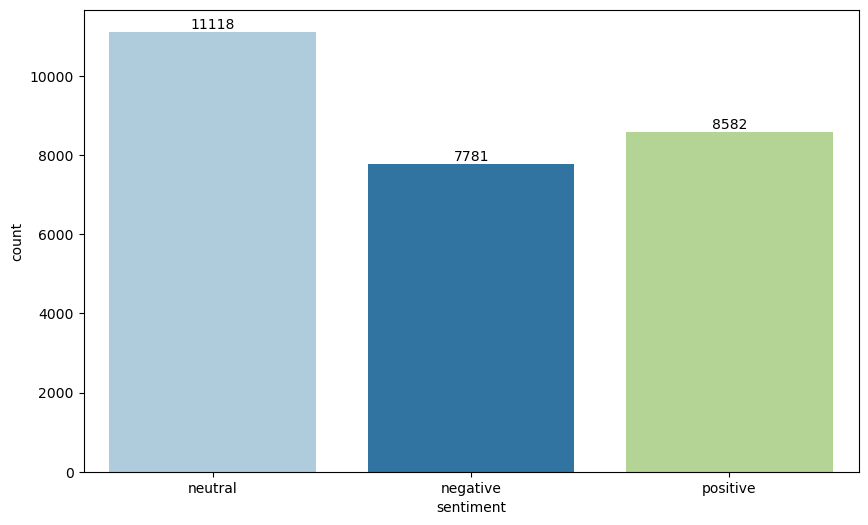

In [12]:
plt.figure(figsize=(10,6))

ax =sns.countplot(x='sentiment',data=train, palette="Paired")
ax.bar_label(ax.containers[0])

[Text(0, 0, '1430'), Text(0, 0, '1103'), Text(0, 0, '1001')]

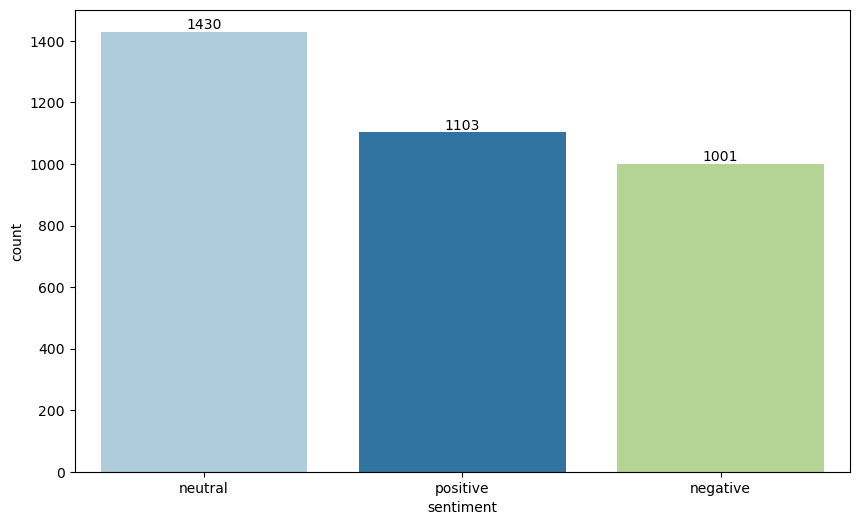

In [13]:
plt.figure(figsize=(10,6))

ax =sns.countplot(x='sentiment',data=test, palette="Paired")
ax.bar_label(ax.containers[0])

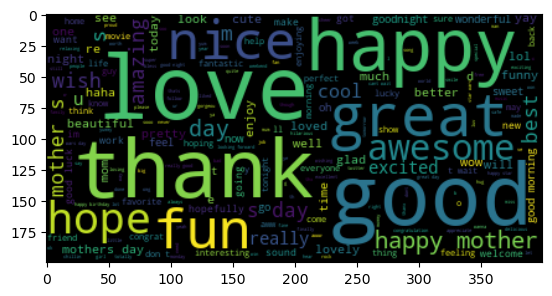

In [14]:
pos_tweets=train[train["sentiment"]=="positive"]
txt= " ".join(tweet.lower() for tweet in pos_tweets["selected_text"])
word_cloud= WordCloud().generate(txt)
plt.imshow(word_cloud, interpolation="bilinear")
plt.show()

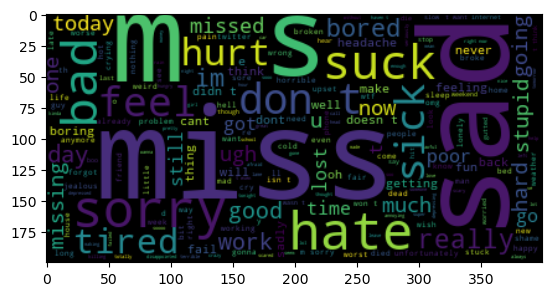

In [15]:
neg_tweets=train[train["sentiment"]=="negative"]
txt= " ".join(tweet.lower() for tweet in neg_tweets["selected_text"])
word_cloud= WordCloud().generate(txt)
plt.imshow(word_cloud, interpolation="bilinear")
plt.show()

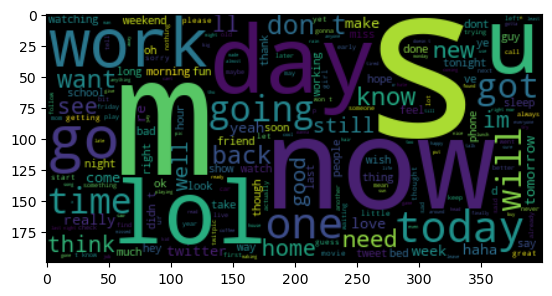

In [16]:
neutral_tweets=train[train["sentiment"]=="neutral"]
txt= " ".join(str(tweet).lower() for tweet in neutral_tweets["selected_text"])
word_cloud= WordCloud().generate(txt)
plt.imshow(word_cloud, interpolation="bilinear")
plt.show()

In [17]:
df= train
df.dropna(inplace=True)

df['num_words'] = train['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df['num_sentences'] = train['text'].apply(lambda x:len(nltk.sent_tokenize(x)))



In [18]:
df

textID                                               text  \
0      cb774db0d1                I`d have responded, if I were going   
1      549e992a42      Sooo SAD I will miss you here in San Diego!!!   
2      088c60f138                          my boss is bullying me...   
3      9642c003ef                     what interview! leave me alone   
4      358bd9e861   Sons of ****, why couldn`t they put them on t...   
...           ...                                                ...   
27476  4eac33d1c0   wish we could come see u on Denver  husband l...   
27477  4f4c4fc327   I`ve wondered about rake to.  The client has ...   
27478  f67aae2310   Yay good for both of you. Enjoy the break - y...   
27479  ed167662a5                         But it was worth it  ****.   
27480  6f7127d9d7     All this flirting going on - The ATG smiles...   

                                           selected_text sentiment  num_words  \
0                    I`d have responded, if I were going   neutral         10   
1                                               Sooo SAD  negative         13   
2                                            bullying me  negative          6   
3                                         leave me alone  negative          6   
4                                          Sons of ****,  negative         20   
...                                                  ...       ...        ...   
27476                                             d lost  negative         18   
27477                                      , don`t force  negative         31   
27478                          Yay good for both of you.  positive         23   
27479                         But it was worth it  ****.  positive         10   
27480  All this flirting going on - The ATG smiles. Y...   neutral         17   

       num_sentences  
0                  1  
1                  2  
2                  1  
3                  2  
4                  1  
...              ...  
27476              1  
27477              2  
27478              2  
27479              1  
27480              3  

[27480 rows x 6 columns]

<AxesSubplot:xlabel='num_words', ylabel='Count'>

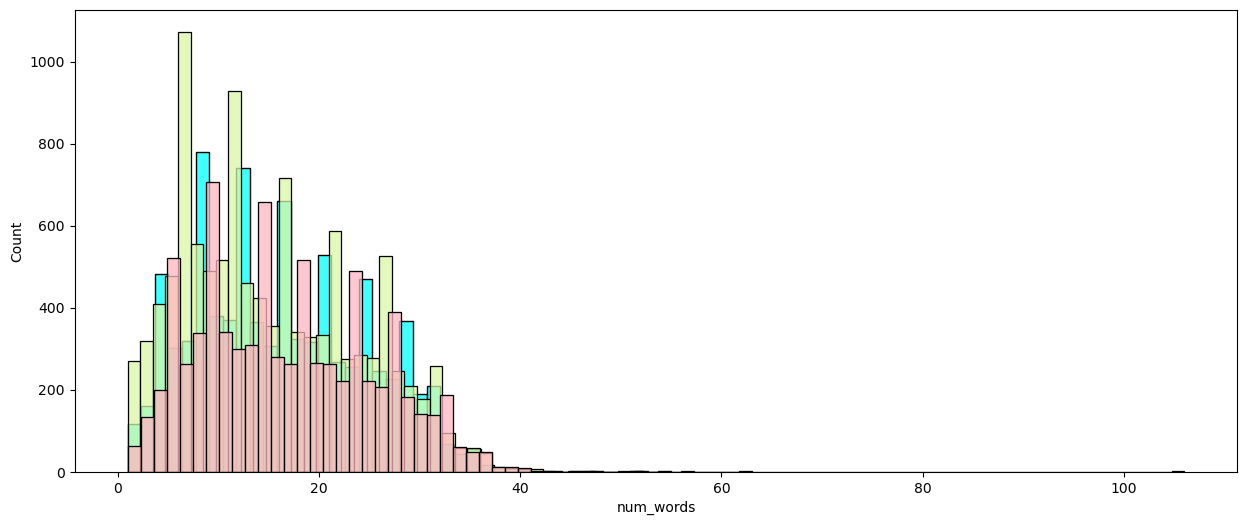

In [19]:
plt.figure(figsize=(15,6))

sns.histplot(df[df['sentiment'] == "positive"]['num_words'],color='aqua')
sns.histplot(df[df['sentiment'] == "neutral"]['num_words'],color='#DAF7A6')
sns.histplot(df[df['sentiment'] == "negative"]['num_words'],color='#ffb6c1')


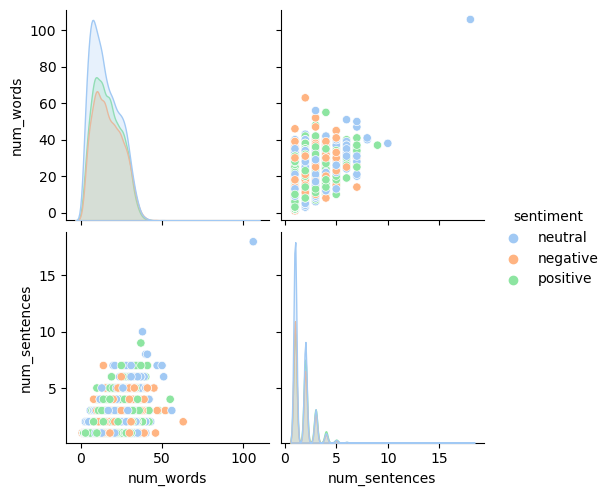

In [20]:
sns.pairplot(df,hue='sentiment',palette="pastel")


TEXT NORMALIZATION

**FINDING** MISSING VALUES

There are some missing values in text and selected text in train data


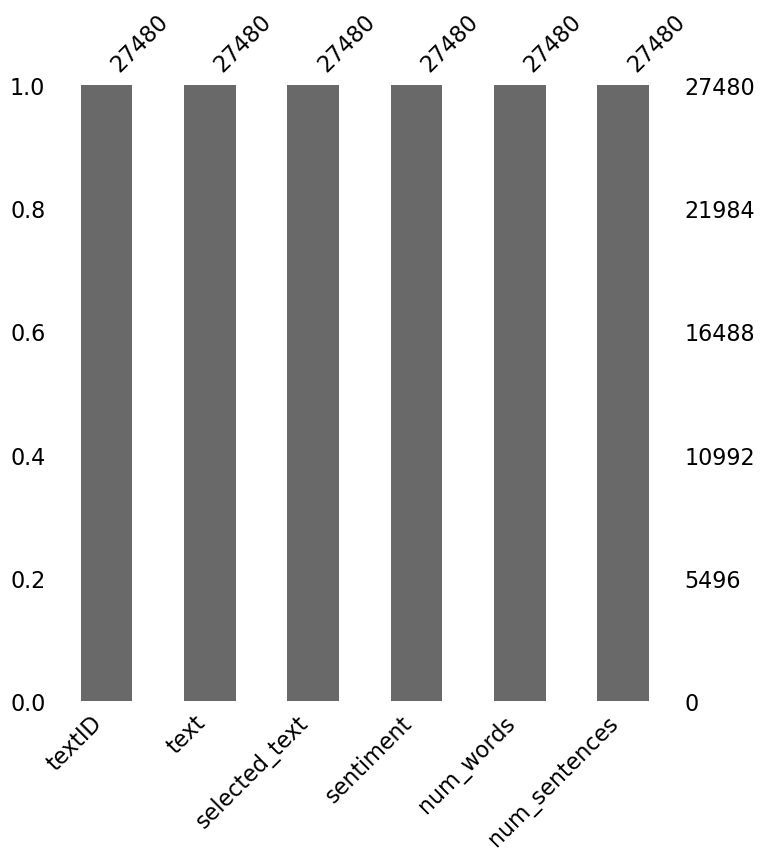

In [21]:

msno.bar(train,figsize = (8,8))
print(Fore.BLUE +"There are some missing values in text and selected text in train data"+Style.RESET_ALL)


There are no missing values in text and selected text in testing data 


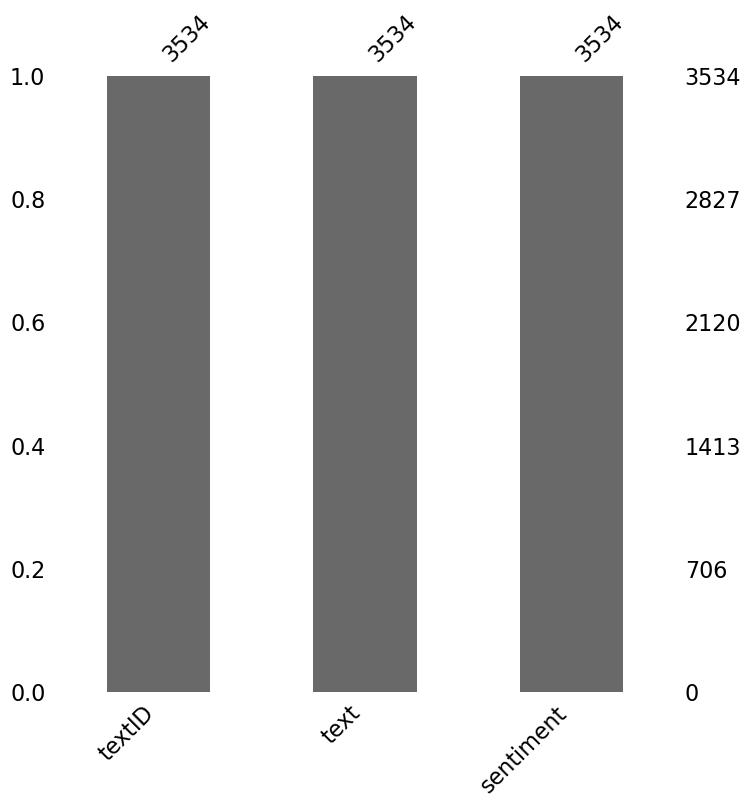

In [22]:

msno.bar(test,figsize = (8,8))
print(Fore.BLUE +"There are no missing values in text and selected text in testing data "+Style.RESET_ALL)

In [23]:
train.isnull().sum()


textID           0
text             0
selected_text    0
sentiment        0
num_words        0
num_sentences    0
dtype: int64

In [24]:
train.dropna(inplace=True)
train.isnull().sum()

textID           0
text             0
selected_text    0
sentiment        0
num_words        0
num_sentences    0
dtype: int64

In [25]:
test.isnull().sum()

textID       0
text         0
sentiment    0
dtype: int64

In [26]:
print(Fore.RED +"The Description of training data"+Style.RESET_ALL)

train.describe()



The Description of training data


num_words  num_sentences
count  27480.000000   27480.000000
mean      15.952875       1.700437
std        8.558301       0.917579
min        1.000000       1.000000
25%        9.000000       1.000000
50%       15.000000       1.000000
75%       22.000000       2.000000
max      106.000000      18.000000

In [27]:
print(Fore.RED +"The Description of testing data"+Style.RESET_ALL)

test.describe()

The Description of testing data


textID                                               text  \
count         3534                                               3534   
unique        3534                                               3534   
top     f87dea47db  Last session of the day  http://twitpic.com/67ezh   
freq             1                                                  1   

       sentiment  
count       3534  
unique         3  
top      neutral  
freq        1430

In [28]:
print(Fore.BLUE +" From the describe function, it is clear that the unique values in data for sentiment is 3  "+Style.RESET_ALL)


 From the describe function, it is clear that the unique values in data for sentiment is 3  


*NON*-NORMALIZED TEXT TO NORMALIZED TEXT

In [29]:
def cleaning_tweets(tweet, user_name=" user ",blank_space=""):
  tweet = re.sub(r'(^|[^@\w])@(\w{1,15})|@\s(\w{1,15})\b',user_name,tweet)
  tweet=emoji.demojize(tweet)
  tweet = re.sub('(https?|http)://[-a-zA-Z0-9+&@#/%?=~_|!:,.;]*[-a-zA-Z0-9+&@#/%=~_|]',blank_space,tweet)
  tweet = re.sub('#+',blank_space,tweet)
  tweet= tweet.lower()
  tweet = re.sub(r'(.)\1+', r'\1\1', tweet) #single occurance of letters
  tweet = re.sub(r'[\?\.\!\,]+(?=[\?\.\!\,])', blank_space, tweet) #ingle occurance for punctuation
  tweet= contractions.fix(tweet)
  
  token_list = word_tokenize(tweet)
  token_list = [token for token in token_list
                  if token not in string.punctuation]

  token_list = [token for token in token_list if token.isalpha()]
  
  stop_words = set(stopwords.words('english'))
  stop_words.discard('not')
  token_list = [token for token in token_list if not token in stop_words]


  tokens = token_list
  stemmer = SnowballStemmer("english") # define stemmer

  stem_token_list = []
  for token in tokens:
    stem_token_list.append(stemmer.stem(token))
  stem = stem_token_list
  return stem


In [30]:
train["tokens"] = train["text"].apply(cleaning_tweets)
train.head(10)

textID                                               text  \
0  cb774db0d1                I`d have responded, if I were going   
1  549e992a42      Sooo SAD I will miss you here in San Diego!!!   
2  088c60f138                          my boss is bullying me...   
3  9642c003ef                     what interview! leave me alone   
4  358bd9e861   Sons of ****, why couldn`t they put them on t...   
5  28b57f3990  http://www.dothebouncy.com/smf - some shameles...   
6  6e0c6d75b1  2am feedings for the baby are fun when he is a...   
7  50e14c0bb8                                         Soooo high   
8  e050245fbd                                        Both of you   
9  fc2cbefa9d   Journey!? Wow... u just became cooler.  hehe....   

                                       selected_text sentiment  num_words  \
0                I`d have responded, if I were going   neutral         10   
1                                           Sooo SAD  negative         13   
2                                        bullying me  negative          6   
3                                     leave me alone  negative          6   
4                                      Sons of ****,  negative         20   
5  http://www.dothebouncy.com/smf - some shameles...   neutral         14   
6                                                fun  positive         14   
7                                         Soooo high   neutral          2   
8                                        Both of you   neutral          3   
9                       Wow... u just became cooler.  positive         19   

   num_sentences                                         tokens  
0              1                                  [respond, go]  
1              2                   [soo, sad, miss, san, diego]  
2              1                                  [boss, bulli]  
3              2                        [interview, leav, alon]  
4              1            [son, put, releas, alreadi, bought]  
5              1  [shameless, plug, best, ranger, forum, earth]  
6              1                  [feed, babi, fun, smile, coo]  
7              1                                    [soo, high]  
8              1                                             []  
9              3   [journey, wow, becam, cooler, hehe, possibl]

In [31]:
test["tokens"] = test["text"].apply(cleaning_tweets)
test.head(10)

textID                                               text sentiment  \
0  f87dea47db  Last session of the day  http://twitpic.com/67ezh   neutral   
1  96d74cb729   Shanghai is also really exciting (precisely -...  positive   
2  eee518ae67  Recession hit Veronique Branquinho, she has to...  negative   
3  01082688c6                                        happy bday!  positive   
4  33987a8ee5             http://twitpic.com/4w75p - I like it!!  positive   
5  726e501993                    that`s great!! weee!! visitors!  positive   
6  261932614e            I THINK EVERYONE HATES ME ON HERE   lol  negative   
7  afa11da83f   soooooo wish i could, but im in school and my...  negative   
8  e64208b4ef   and within a short time of the last clue all ...   neutral   
9  37bcad24ca   What did you get?  My day is alright.. haven`...   neutral   

                                              tokens  
0                               [last, session, day]  
1  [shanghai, also, realli, excit, precis, skyscr...  
2  [recess, hit, veroniqu, branquinho, quit, comp...  
3                                  [happi, birthday]  
4                                             [like]  
5                              [great, wee, visitor]  
6                        [think, everyon, hate, lol]  
7  [soo, wish, could, school, myspac, complet, bl...  
8                  [within, short, time, last, clue]  
9  [get, day, alright, done, anyth, yet, leav, so...

## Adding the target variable as tweet Sentiment

In [32]:
train["tweet_sentiment"] = train["sentiment"].apply(lambda i: 1
                                              if i == "positive" else -1 if i == "negative" else 0)
train.head(10)

textID                                               text  \
0  cb774db0d1                I`d have responded, if I were going   
1  549e992a42      Sooo SAD I will miss you here in San Diego!!!   
2  088c60f138                          my boss is bullying me...   
3  9642c003ef                     what interview! leave me alone   
4  358bd9e861   Sons of ****, why couldn`t they put them on t...   
5  28b57f3990  http://www.dothebouncy.com/smf - some shameles...   
6  6e0c6d75b1  2am feedings for the baby are fun when he is a...   
7  50e14c0bb8                                         Soooo high   
8  e050245fbd                                        Both of you   
9  fc2cbefa9d   Journey!? Wow... u just became cooler.  hehe....   

                                       selected_text sentiment  num_words  \
0                I`d have responded, if I were going   neutral         10   
1                                           Sooo SAD  negative         13   
2                                        bullying me  negative          6   
3                                     leave me alone  negative          6   
4                                      Sons of ****,  negative         20   
5  http://www.dothebouncy.com/smf - some shameles...   neutral         14   
6                                                fun  positive         14   
7                                         Soooo high   neutral          2   
8                                        Both of you   neutral          3   
9                       Wow... u just became cooler.  positive         19   

   num_sentences                                         tokens  \
0              1                                  [respond, go]   
1              2                   [soo, sad, miss, san, diego]   
2              1                                  [boss, bulli]   
3              2                        [interview, leav, alon]   
4              1            [son, put, releas, alreadi, bought]   
5              1  [shameless, plug, best, ranger, forum, earth]   
6              1                  [feed, babi, fun, smile, coo]   
7              1                                    [soo, high]   
8              1                                             []   
9              3   [journey, wow, becam, cooler, hehe, possibl]   

   tweet_sentiment  
0                0  
1               -1  
2               -1  
3               -1  
4               -1  
5                0  
6                1  
7                0  
8                0  
9                1

In [33]:
test["tweet_sentiment"] = test["sentiment"].apply(lambda i: 1
                                              if i == "positive" else -1 if i == "negative" else 0)
test.head(10)

textID                                               text sentiment  \
0  f87dea47db  Last session of the day  http://twitpic.com/67ezh   neutral   
1  96d74cb729   Shanghai is also really exciting (precisely -...  positive   
2  eee518ae67  Recession hit Veronique Branquinho, she has to...  negative   
3  01082688c6                                        happy bday!  positive   
4  33987a8ee5             http://twitpic.com/4w75p - I like it!!  positive   
5  726e501993                    that`s great!! weee!! visitors!  positive   
6  261932614e            I THINK EVERYONE HATES ME ON HERE   lol  negative   
7  afa11da83f   soooooo wish i could, but im in school and my...  negative   
8  e64208b4ef   and within a short time of the last clue all ...   neutral   
9  37bcad24ca   What did you get?  My day is alright.. haven`...   neutral   

                                              tokens  tweet_sentiment  
0                               [last, session, day]                0  
1  [shanghai, also, realli, excit, precis, skyscr...                1  
2  [recess, hit, veroniqu, branquinho, quit, comp...               -1  
3                                  [happi, birthday]                1  
4                                             [like]                1  
5                              [great, wee, visitor]                1  
6                        [think, everyon, hate, lol]               -1  
7  [soo, wish, could, school, myspac, complet, bl...               -1  
8                  [within, short, time, last, clue]                0  
9  [get, day, alright, done, anyth, yet, leav, so...                0

### Splitting the training and testing data into X(features) and Y(target)

In [34]:
X_train = train["tokens"].tolist()
Y_train = train["tweet_sentiment"].tolist()

In [35]:
# print(X_train)
# print(Y_train)

In [36]:
X_test = test["tokens"].tolist()
Y_test = test["tweet_sentiment"].tolist()

In [37]:
# print(X_test)
# print(Y_test)

In [38]:

print(Fore.BLUE +"Size of X_train: "+Style.RESET_ALL+"{}".format(len(X_train)))
print(Fore.BLUE +"Size of y_train: "+Style.RESET_ALL+"{}".format(len(Y_train)))
print("\n")
print(Fore.BLUE +"Size of X_test: "+Style.RESET_ALL+" {}".format(len(X_test)))
print(Fore.BLUE +"Size of y_test: "+Style.RESET_ALL+" {}".format(len(Y_test)))
print("\n")
print(Fore.BLUE +"Train proportion: "+Style.RESET_ALL+" {:.0%}".format(len(X_train)/
                                        (len(X_train)+len(X_test))))

Size of X_train: 27480
Size of y_train: 27480


Size of X_test:  3534
Size of y_test:  3534


Train proportion:  89%


In [39]:
id = random.randint(0,len(X_train))
print(Fore.GREEN +"Train tweet: "+Style.RESET_ALL+" {}".format(X_train[id]))
print(Fore.GREEN +"Sentiment: "+Style.RESET_ALL+" {}".format(Y_train[id]))

Train tweet:  ['cougar', 'privaci', 'threaten', 'surveil', 'increas', 'sorri', 'help', 'one']
Sentiment:  -1


In [40]:
def word_relation_sentiment(tweets, target):
  dict_freqs = {}
  for tweet, sentiment in zip(tweets, target):
    for word in tweet:
      pair = (word, sentiment)
      if pair not in dict_freqs:
        dict_freqs[pair] = 1
      else:
        dict_freqs[pair] = dict_freqs[pair] + 1
  return dict_freqs

In [41]:
count_train_relation = word_relation_sentiment(X_train, Y_train)
count_test_relation = word_relation_sentiment(X_test, Y_test)

In [42]:
print(Fore.GREEN +"Frequency of word 'good' in + tweets: "+Style.RESET_ALL+"  {}".format(count_train_relation[("good", 1)]))
print(Fore.GREEN+"Frequency of word 'good' in neutral tweets: "+Style.RESET_ALL+"  {}".format(count_train_relation[("good", 0)]))
print(Fore.GREEN +"Frequency of word 'good' in - tweets: "+Style.RESET_ALL+"  {}".format(count_train_relation[("good", -1)]))

Frequency of word 'good' in + tweets:   1075
Frequency of word 'good' in neutral tweets:   312
Frequency of word 'good' in - tweets:   206


In [43]:
print(Fore.GREEN + "Frequency of word 'hate' in + tweets: "+Style.RESET_ALL+"  {}".format(count_train_relation[("hate", 1)]))
print(Fore.GREEN + "Frequency of word 'hate' in neutral tweets: "+Style.RESET_ALL+"  {}".format(count_train_relation[("hate", 0)]))
print(Fore.GREEN + "Frequency of word 'hate' in - tweets: "+Style.RESET_ALL+"  {}".format(count_train_relation[("hate", -1)]))

Frequency of word 'hate' in + tweets:   9
Frequency of word 'hate' in neutral tweets:   61
Frequency of word 'hate' in - tweets:   314


In [44]:
print(Fore.GREEN+ "Frequency of word 'good' in + tweets: "+Style.RESET_ALL+" {}".format(count_test_relation[("good", 1)]))
print(Fore.GREEN+ "Frequency of word 'good' in neutral tweets: "+Style.RESET_ALL+" {}".format(count_test_relation[("good", 0)]))
print(Fore.GREEN+ "Frequency of word 'good' in - tweets: "+Style.RESET_ALL+"  {}".format(count_test_relation[("good", -1)]))

Frequency of word 'good' in + tweets:  145
Frequency of word 'good' in neutral tweets:  41
Frequency of word 'good' in - tweets:   26


In [45]:
print(Fore.GREEN+ "Frequency of word 'bad' in + tweets: "+Style.RESET_ALL+"  {}".format(count_test_relation[("bad", 1)]))
print(Fore.GREEN+"Frequency of word 'bad' in neutral tweets: "+Style.RESET_ALL+"  {}".format(count_test_relation[("bad", 0)]))
print(Fore.GREEN+"Frequency of word 'bad' in - tweets: "+Style.RESET_ALL+"  {}".format(count_test_relation[("bad", -1)]))

Frequency of word 'bad' in + tweets:   2
Frequency of word 'bad' in neutral tweets:   16
Frequency of word 'bad' in - tweets:   38


In [46]:
def tweet_to_freq(tweet, dict_freqs):
  x = np.zeros((3,))
  for word in tweet:
    if (word, 1) in dict_freqs:
      x[0] = x[0]  + dict_freqs[(word, 1)]
    if (word, 0) in dict_freqs:
      x[1] =  x[1] +  dict_freqs[(word, 0)]
    if (word, -1) in dict_freqs:
      x[2] = x[2] + dict_freqs[(word, -1)]
  return x

In [47]:
print(tweet_to_freq(["i", "hate", "you"], count_train_relation),"\n")
print(tweet_to_freq(["i", "hate", "you"], count_test_relation))

[  9.  61. 314.] 

[ 0.  8. 38.]


In [48]:
word1 = "happi"
word2 = "hate"

def word_features(word, dict_freqs):
  x = np.zeros((2,))
  if (word, 1) in dict_freqs:
    x[0] = np.log(dict_freqs[(word, 1)] + 1)
  if (word, 0) in dict_freqs:
    x[1] = np.log(dict_freqs[(word, 0)] + 1)
  return x

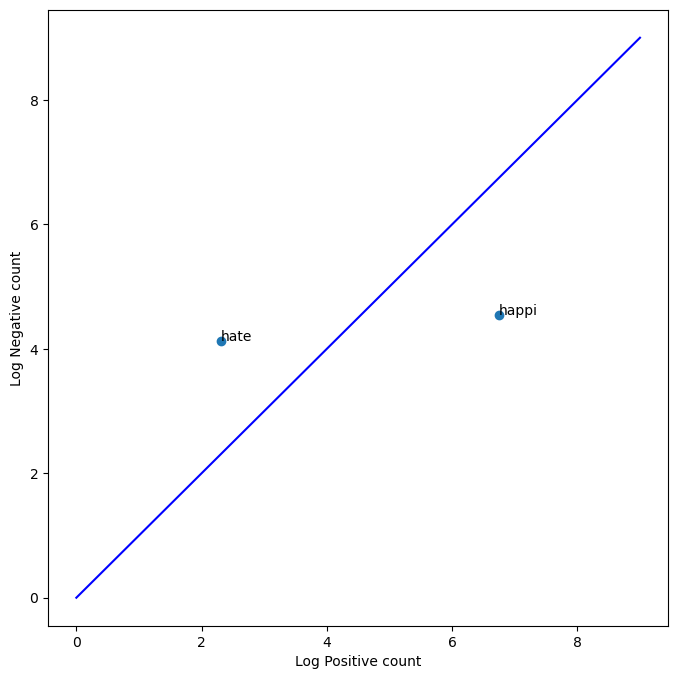

In [49]:

fig, ax = plt.subplots(figsize = (8, 8))

x_axis = [word_features(word, count_train_relation)[0] for word in [word1, word2]]
y_axis = [word_features(word, count_train_relation)[1] for word in [word1, word2]]

ax.scatter(x_axis, y_axis)  

plt.xlabel("Log Positive count")
plt.ylabel("Log Negative count")

ax.plot([0, 9], [0, 9], color = 'blue')
plt.text(x_axis[0], y_axis[0], word1)
plt.text(x_axis[1], y_axis[1], word2)
plt.show()

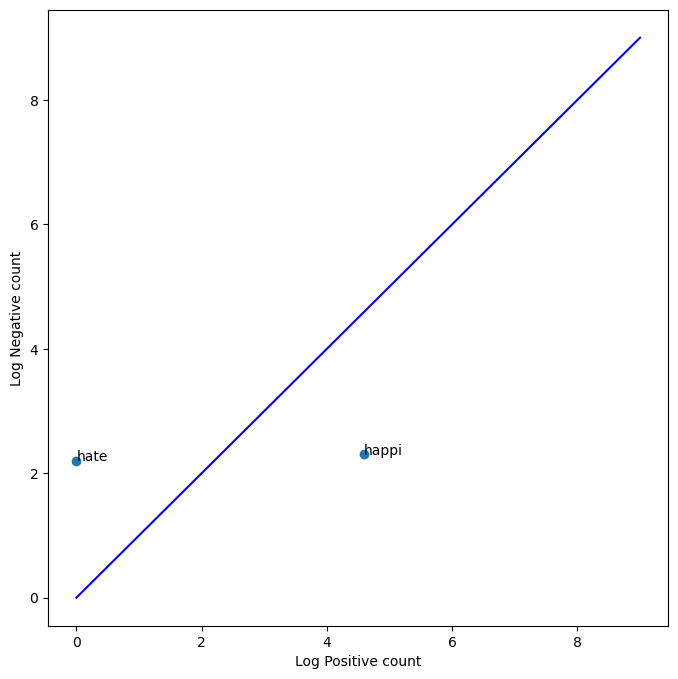

In [50]:
fig, ax = plt.subplots(figsize = (8, 8))

x_axis = [word_features(word, count_test_relation)[0] for word in [word1, word2]]
y_axis = [word_features(word, count_test_relation)[1] for word in [word1, word2]]

ax.scatter(x_axis, y_axis)  

plt.xlabel("Log Positive count")
plt.ylabel("Log Negative count")

ax.plot([0, 9], [0, 9], color = 'blue')
plt.text(x_axis[0], y_axis[0], word1)
plt.text(x_axis[1], y_axis[1], word2)
plt.show()

Using count_vectorizer and Tf-Idf 

In [51]:
def fit_cv(tweet_corpus):
  cv_vect = CountVectorizer(tokenizer=lambda x: x,
                            preprocessor=lambda x: x)
  cv_vect.fit(tweet_corpus)
  return cv_vect

In [52]:
def fit_tfidf(tweet_corpus):
  tf_vect = TfidfVectorizer(preprocessor=lambda x: x,
                            tokenizer=lambda x: x)
  tf_vect.fit(tweet_corpus)
  return tf_vect

In [53]:
def plot_confusion(cm):
  plt.figure(figsize = (5,5))
  sn.heatmap(cm, annot=True, cmap="Blues", fmt='.0f')
  plt.xlabel("Predicted value")
  plt.ylabel("Actual value")
  plt.title("Confusion Matrix")
  return sn

In [54]:
# frequency of tweets in training and testing *data*
X_train_pn = [tweet_to_freq(tweet, count_train_relation) for tweet in X_train]
X_test_pn = [tweet_to_freq(tweet, count_test_relation) for tweet in X_test]

cv = fit_cv(X_train)
X_train_cv = cv.transform(X_train)
X_test_cv = cv.transform(X_test)

tf = fit_tfidf(X_train)
X_train_tf = tf.transform(X_train)
X_test_tf = tf.transform(X_test)

**Testing a tweet**

In [55]:
your_tweet = """He hate cats!"""

In [56]:
def predict_tweet(tweet,model):
  processed_tweet = cleaning_tweets(tweet)
  transformed_tweet = tf.transform([processed_tweet])
  prediction = model.predict(transformed_tweet)

  if prediction == 1:
    return "Prediction is positive sentiment"
  elif  prediction == -1:
    return "Prediction is negative sentiment"
  else:
    return "Prediction is neutral sentiment"

#### Model Evaluation



**Naive Bayes Classifier**

In [57]:
classifiers=[]
frequency=[]
count_vectorizer=[]
tf_idf=[]

In [58]:
def naiveBayes(X_train, Y_train,X_test):
  model = MultinomialNB()
  model.fit(X_train, Y_train)
  y_pred = model.predict(X_test)
  print(Fore.GREEN + "NB Model Accuracy: "+Style.RESET_ALL+" {:.2%}".format(accuracy_score(Y_test, y_pred)))
  plot_confusion(confusion_matrix(Y_test, y_pred))
  print(classification_report(Y_test, y_pred))
  return accuracy_score(Y_test, y_pred)


  

NB Model Accuracy:  64.52%
              precision    recall  f1-score   support

          -1       0.61      0.72      0.66      1001
           0       0.61      0.56      0.58      1430
           1       0.73      0.69      0.71      1103

    accuracy                           0.65      3534
   macro avg       0.65      0.66      0.65      3534
weighted avg       0.65      0.65      0.64      3534



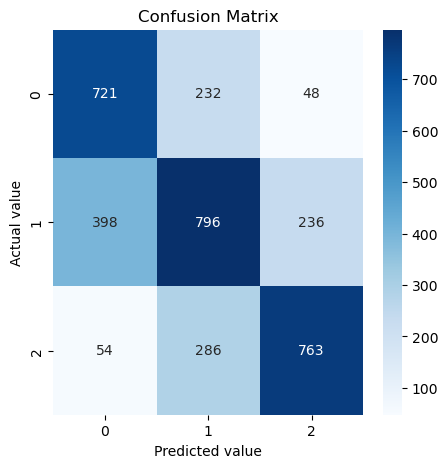

In [59]:
accuracy1=naiveBayes(X_train_pn, Y_train,X_test_pn)

Count Vectorizer

NB Model Accuracy:  66.78%
              precision    recall  f1-score   support

          -1       0.69      0.63      0.66      1001
           0       0.61      0.69      0.65      1430
           1       0.74      0.68      0.71      1103

    accuracy                           0.67      3534
   macro avg       0.68      0.66      0.67      3534
weighted avg       0.67      0.67      0.67      3534



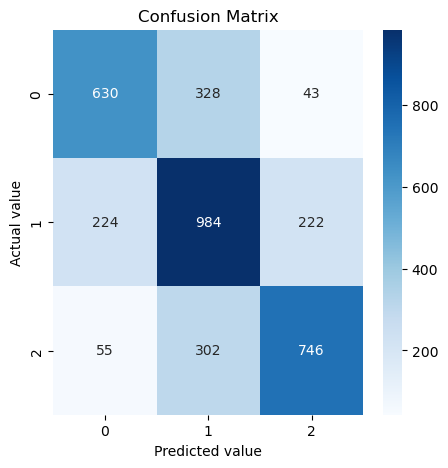

In [60]:
accuracy2=naiveBayes(X_train_cv, Y_train,X_test_cv)

**Tfidf**


NB Model Accuracy:  63.67%
              precision    recall  f1-score   support

          -1       0.74      0.45      0.56      1001
           0       0.55      0.80      0.65      1430
           1       0.77      0.58      0.66      1103

    accuracy                           0.64      3534
   macro avg       0.69      0.61      0.63      3534
weighted avg       0.67      0.64      0.63      3534



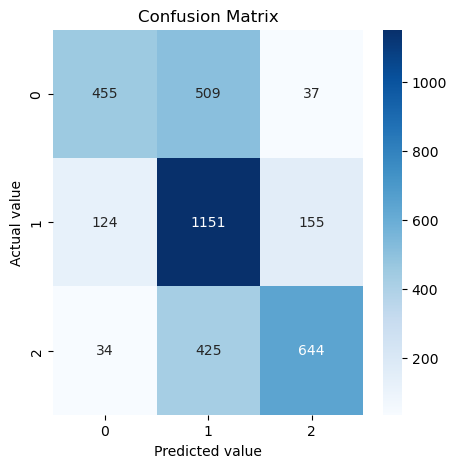

In [61]:
accuracy3=naiveBayes(X_train_tf, Y_train,X_test_tf)

In [62]:
classifiers.append("MultinomialNB()")
frequency.append(accuracy1)
count_vectorizer.append(accuracy2)
tf_idf.append(accuracy3)

In [63]:
model = MultinomialNB()
model.fit(X_train_cv, Y_train)

MultinomialNB()

In [64]:
def BernouliNB(X_train, Y_train,X_test):
  model = BernoulliNB()
  model.fit(X_train, Y_train)
  y_pred = model.predict(X_test)
  print(Fore.GREEN + "NB Model Accuracy: "+Style.RESET_ALL+" {:.2%}".format(accuracy_score(Y_test, y_pred)))
  plot_confusion(confusion_matrix(Y_test, y_pred))
  print(classification_report(Y_test, y_pred))
  return accuracy_score(Y_test, y_pred)

NB Model Accuracy:  40.46%
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00      1001
           0       0.40      1.00      0.58      1430
           1       0.00      0.00      0.00      1103

    accuracy                           0.40      3534
   macro avg       0.13      0.33      0.19      3534
weighted avg       0.16      0.40      0.23      3534



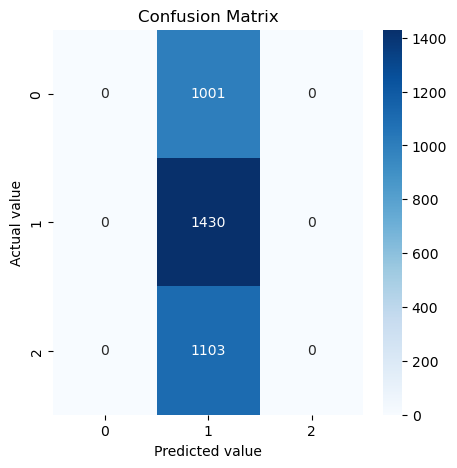

In [65]:
accuracy1=BernouliNB(X_train_pn, Y_train,X_test_pn)

NB Model Accuracy:  66.30%
              precision    recall  f1-score   support

          -1       0.72      0.53      0.61      1001
           0       0.58      0.78      0.67      1430
           1       0.80      0.63      0.71      1103

    accuracy                           0.66      3534
   macro avg       0.70      0.65      0.66      3534
weighted avg       0.69      0.66      0.66      3534



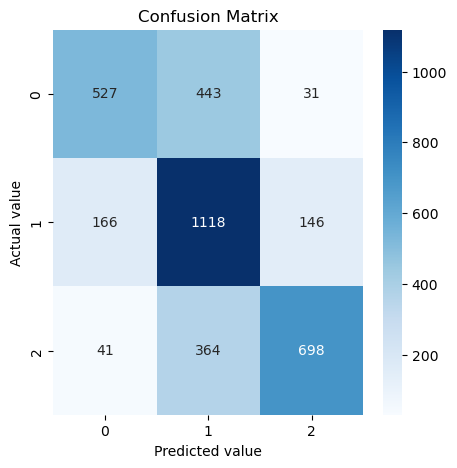

In [66]:
accuracy2=BernouliNB(X_train_cv, Y_train,X_test_cv)

NB Model Accuracy:  66.30%
              precision    recall  f1-score   support

          -1       0.72      0.53      0.61      1001
           0       0.58      0.78      0.67      1430
           1       0.80      0.63      0.71      1103

    accuracy                           0.66      3534
   macro avg       0.70      0.65      0.66      3534
weighted avg       0.69      0.66      0.66      3534



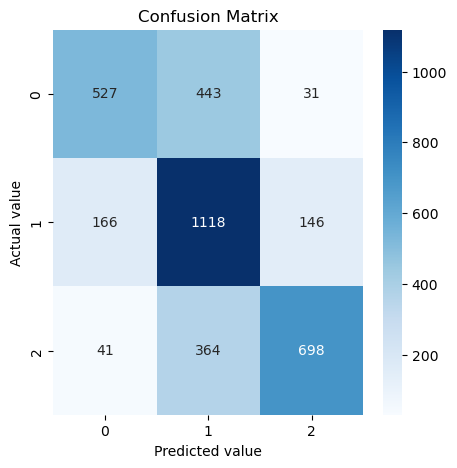

In [67]:
accuracy3=BernouliNB(X_train_tf, Y_train,X_test_tf)

In [68]:
classifiers.append("BernoulliNB()")
frequency.append(accuracy1)
count_vectorizer.append(accuracy2)
tf_idf.append(accuracy3)

#### Logistic Regression

In [69]:
def fit_lr(X_train, y_train):
  model = LogisticRegression(solver='liblinear')
  model.fit(X_train, y_train)
  return model

In [70]:
def simple_lr(X_train,X_test):
  model_var = fit_lr(X_train, Y_train)
  print(model_var.coef_, model_var.intercept_)
  y_pred_lr = model_var.predict(X_test)
  print(Fore.GREEN+ "LR Model Accuracy: "+Style.RESET_ALL+" {:.2%}".format(accuracy_score(Y_test, y_pred_lr)))
  plot_confusion(confusion_matrix(Y_test, y_pred_lr))
  print(classification_report(Y_test, y_pred_lr))
  return accuracy_score(Y_test, y_pred_lr)


[[-0.00097715 -0.00270031  0.00410965]
 [-0.00141925  0.00283778 -0.00237615]
 [ 0.00193083  0.00034299 -0.00236608]] [-0.78656518 -0.0321237  -1.25100644]
LR Model Accuracy:  41.11%
              precision    recall  f1-score   support

          -1       0.86      0.01      0.01      1001
           0       0.41      1.00      0.58      1430
           1       1.00      0.02      0.03      1103

    accuracy                           0.41      3534
   macro avg       0.75      0.34      0.21      3534
weighted avg       0.72      0.41      0.25      3534



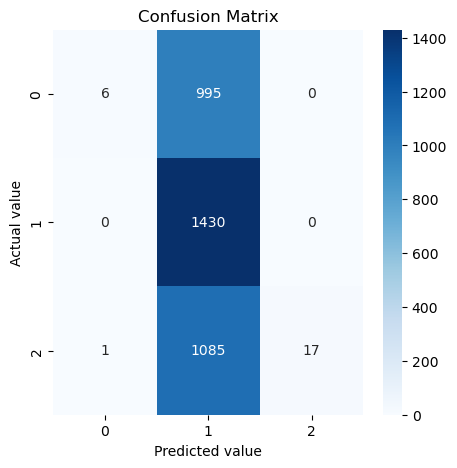

In [71]:
accuracy1=simple_lr(X_train_pn, X_test_pn )

using count_vectorizer

[[-0.38872405 -0.18817431 -0.03707893 ...  0.03470277  0.22097529
   0.49776196]
 [ 0.59484307  0.26886617 -0.24074657 ... -0.13395499 -0.37859378
  -0.41016784]
 [-0.34894896 -0.0993809   0.28015565 ... -0.00137131  0.17575721
  -0.08461213]] [-1.37169462  0.3546252  -1.71845032]
LR Model Accuracy:  70.94%
              precision    recall  f1-score   support

          -1       0.71      0.65      0.68      1001
           0       0.65      0.73      0.69      1430
           1       0.80      0.73      0.77      1103

    accuracy                           0.71      3534
   macro avg       0.72      0.71      0.71      3534
weighted avg       0.71      0.71      0.71      3534



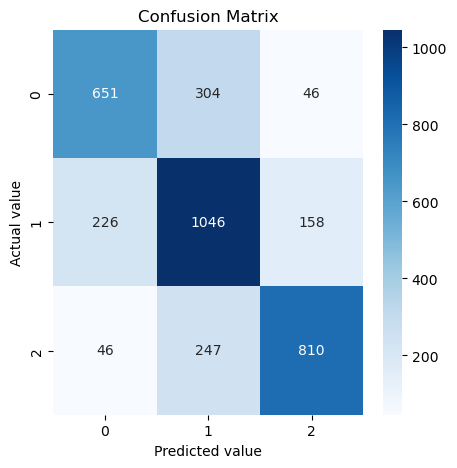

In [72]:
accuracy2=simple_lr(X_train_cv, X_test_cv)

using tfidf

[[-0.26185438 -0.11982041 -0.05091091 ...  0.07714185  0.22796796
   0.40454318]
 [ 0.54678322  0.19633915 -0.16479955 ... -0.12465442 -0.23997413
  -0.28770992]
 [-0.33589063 -0.07422501  0.23113874 ... -0.01074716  0.08378348
  -0.09442758]] [-1.24340065  0.29558601 -1.62231574]
LR Model Accuracy:  71.00%
              precision    recall  f1-score   support

          -1       0.73      0.64      0.68      1001
           0       0.65      0.75      0.69      1430
           1       0.80      0.72      0.76      1103

    accuracy                           0.71      3534
   macro avg       0.73      0.70      0.71      3534
weighted avg       0.72      0.71      0.71      3534



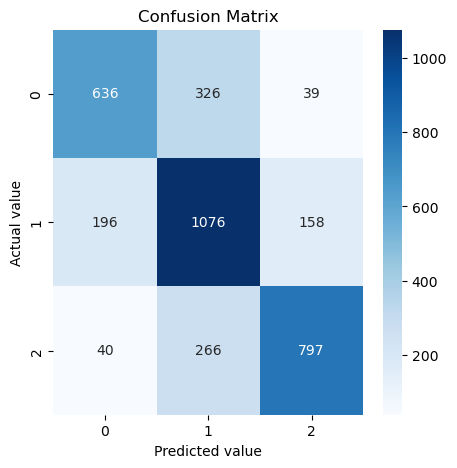

In [73]:
accuracy3=simple_lr(X_train_tf, X_test_tf)

In [74]:
classifiers.append("Logistic Regression")
frequency.append(accuracy1)
count_vectorizer.append(accuracy2)
tf_idf.append(accuracy3)

### Prediction

In [75]:
model= fit_lr(X_train_tf, Y_train)

In [76]:
predict_tweet(your_tweet,model)

'Prediction is negative sentiment'

In [77]:
def Rclassifier(X_train, Y_train,X_test):
  rfc = RandomForestClassifier(n_estimators=200,random_state=0)
  rfc.fit(X_train, Y_train)
  y_pred = rfc.predict(X_test)
  print(Fore.GREEN + "RC Model Accuracy: "+Style.RESET_ALL+" {:.2%}".format(accuracy_score(Y_test, y_pred)))
  plot_confusion(confusion_matrix(Y_test, y_pred))
  print(classification_report(Y_test, y_pred))
  return accuracy_score(Y_test, y_pred)


RC Model Accuracy:  64.09%
              precision    recall  f1-score   support

          -1       0.67      0.55      0.60      1001
           0       0.58      0.74      0.65      1430
           1       0.75      0.59      0.66      1103

    accuracy                           0.64      3534
   macro avg       0.67      0.63      0.64      3534
weighted avg       0.66      0.64      0.64      3534



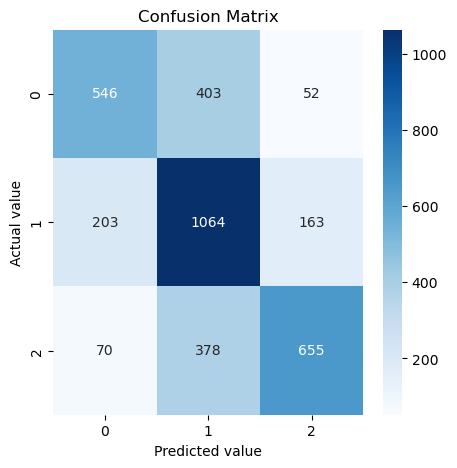

In [78]:
accuracy1=Rclassifier(X_train_pn, Y_train,X_test_pn)


RC Model Accuracy:  70.49%
              precision    recall  f1-score   support

          -1       0.70      0.66      0.68      1001
           0       0.67      0.69      0.68      1430
           1       0.76      0.76      0.76      1103

    accuracy                           0.70      3534
   macro avg       0.71      0.71      0.71      3534
weighted avg       0.71      0.70      0.70      3534



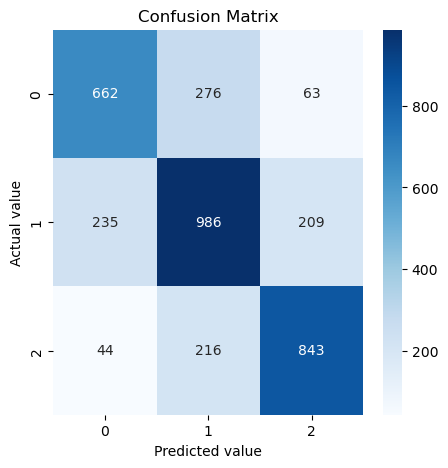

In [79]:
accuracy2=Rclassifier(X_train_cv, Y_train,X_test_cv)


NOTE: From this step the execution time will increase which is completely dependent on GPU. If you encounter the dead kernel then try to compile the code in online compilers such as Google collab which has inbult GPU.

RC Model Accuracy:  71.53%
              precision    recall  f1-score   support

          -1       0.73      0.65      0.69      1001
           0       0.66      0.73      0.69      1430
           1       0.78      0.76      0.77      1103

    accuracy                           0.72      3534
   macro avg       0.72      0.71      0.72      3534
weighted avg       0.72      0.72      0.72      3534



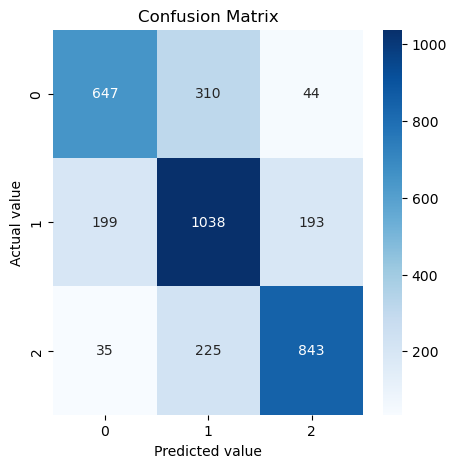

In [80]:
accuracy3=Rclassifier(X_train_tf, Y_train,X_test_tf)


In [81]:
classifiers.append("RandomForestClassifier")
frequency.append(accuracy1)
count_vectorizer.append(accuracy2)
tf_idf.append(accuracy3)

### Using Grid Search CV

In [82]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [5,6,7,8],
    'criterion' :['gini', 'entropy'],
    'bootstrap' : [True, False]

}
rfc = RandomForestClassifier(n_estimators=200,random_state=0)
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train_tf, Y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=200, random_state=0),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [83]:
CV_rfc.best_params_


{'bootstrap': False,
 'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'sqrt',
 'n_estimators': 500}

In [84]:
def Rclassifier_cv(X_train, Y_train,X_test):
  rfc1=RandomForestClassifier(random_state=0, max_features='log2',bootstrap = True,n_estimators= 1500, max_depth=8, criterion='gini')
  rfc1.fit(X_train, Y_train)
  y_pred = rfc1.predict(X_test)
  print(Fore.GREEN + "RC Model Accuracy: "+Style.RESET_ALL+" {:.2%}".format(accuracy_score(Y_test, y_pred)))
  plot_confusion(confusion_matrix(Y_test, y_pred))
  print(classification_report(Y_test, y_pred))
  return accuracy_score(Y_test, y_pred)


RC Model Accuracy:  58.18%
              precision    recall  f1-score   support

          -1       0.88      0.29      0.44      1001
           0       0.49      0.94      0.65      1430
           1       0.87      0.39      0.54      1103

    accuracy                           0.58      3534
   macro avg       0.75      0.54      0.54      3534
weighted avg       0.72      0.58      0.55      3534



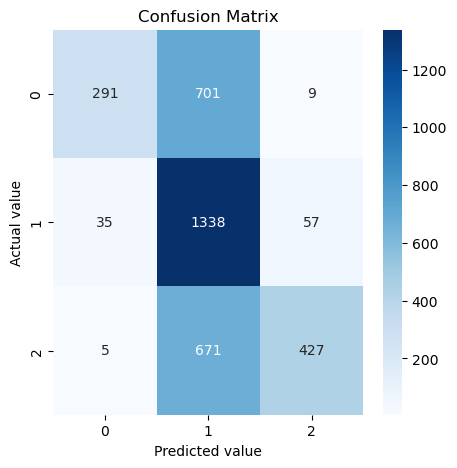

In [85]:
accuracy1=Rclassifier_cv(X_train_pn, Y_train,X_test_pn)


RC Model Accuracy:  40.46%
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00      1001
           0       0.40      1.00      0.58      1430
           1       0.00      0.00      0.00      1103

    accuracy                           0.40      3534
   macro avg       0.13      0.33      0.19      3534
weighted avg       0.16      0.40      0.23      3534



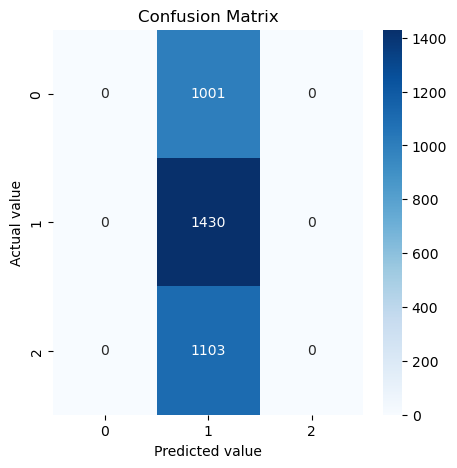

In [86]:
accuracy2=Rclassifier_cv(X_train_cv, Y_train,X_test_cv)


RC Model Accuracy:  40.46%
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00      1001
           0       0.40      1.00      0.58      1430
           1       0.00      0.00      0.00      1103

    accuracy                           0.40      3534
   macro avg       0.13      0.33      0.19      3534
weighted avg       0.16      0.40      0.23      3534



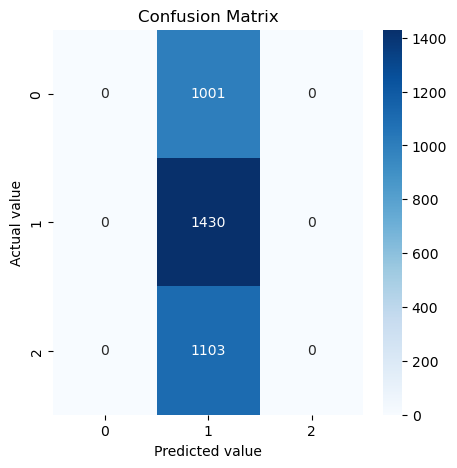

In [87]:
accuracy3=Rclassifier_cv(X_train_tf, Y_train,X_test_tf)


In [88]:
classifiers.append("RandomForestC_CV")
frequency.append(accuracy1)
count_vectorizer.append(accuracy2)
tf_idf.append(accuracy3)

### Support Vector Machine

In [89]:
from sklearn import svm

def svm_c(X_train, Y_train,X_test):
  svm_class=svm.SVC(kernel='linear')
  svm_class.fit(X_train, Y_train)
  y_pred = svm_class.predict(X_test)
  print(Fore.GREEN + "SVM Model Accuracy: "+Style.RESET_ALL+" {:.2%}".format(accuracy_score(Y_test, y_pred)))
  plot_confusion(confusion_matrix(Y_test, y_pred))
  print(classification_report(Y_test, y_pred))
  return accuracy_score(Y_test, y_pred)


# 

In [90]:
accuracy1=0.1

#### Count Vecorizer

SVM Model Accuracy:  70.74%
              precision    recall  f1-score   support

          -1       0.68      0.67      0.68      1001
           0       0.67      0.70      0.68      1430
           1       0.79      0.74      0.77      1103

    accuracy                           0.71      3534
   macro avg       0.71      0.71      0.71      3534
weighted avg       0.71      0.71      0.71      3534



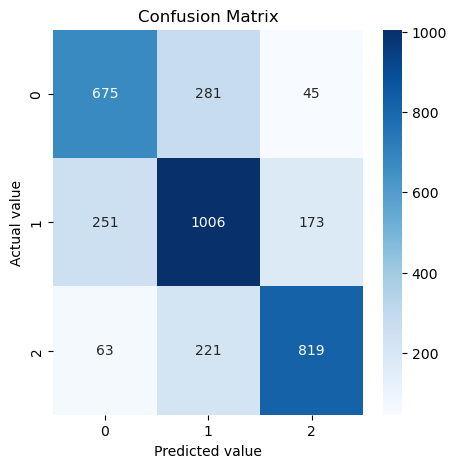

In [91]:
accuracy2=svm_c(X_train_cv, Y_train,X_test_cv)


#### Tf-idf vectorizer

SVM Model Accuracy:  71.79%
              precision    recall  f1-score   support

          -1       0.72      0.67      0.69      1001
           0       0.66      0.75      0.70      1430
           1       0.81      0.73      0.77      1103

    accuracy                           0.72      3534
   macro avg       0.73      0.71      0.72      3534
weighted avg       0.72      0.72      0.72      3534



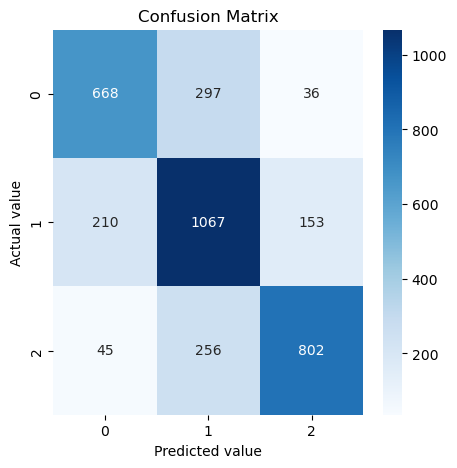

In [92]:
accuracy3=svm_c(X_train_tf, Y_train,X_test_tf)


In [105]:
predict_tweet(your_tweet,model)

'Prediction is negative sentiment'

In [93]:
classifiers.append("SVM-SVC")
frequency.append(accuracy1)
count_vectorizer.append(accuracy2)
tf_idf.append(accuracy3)

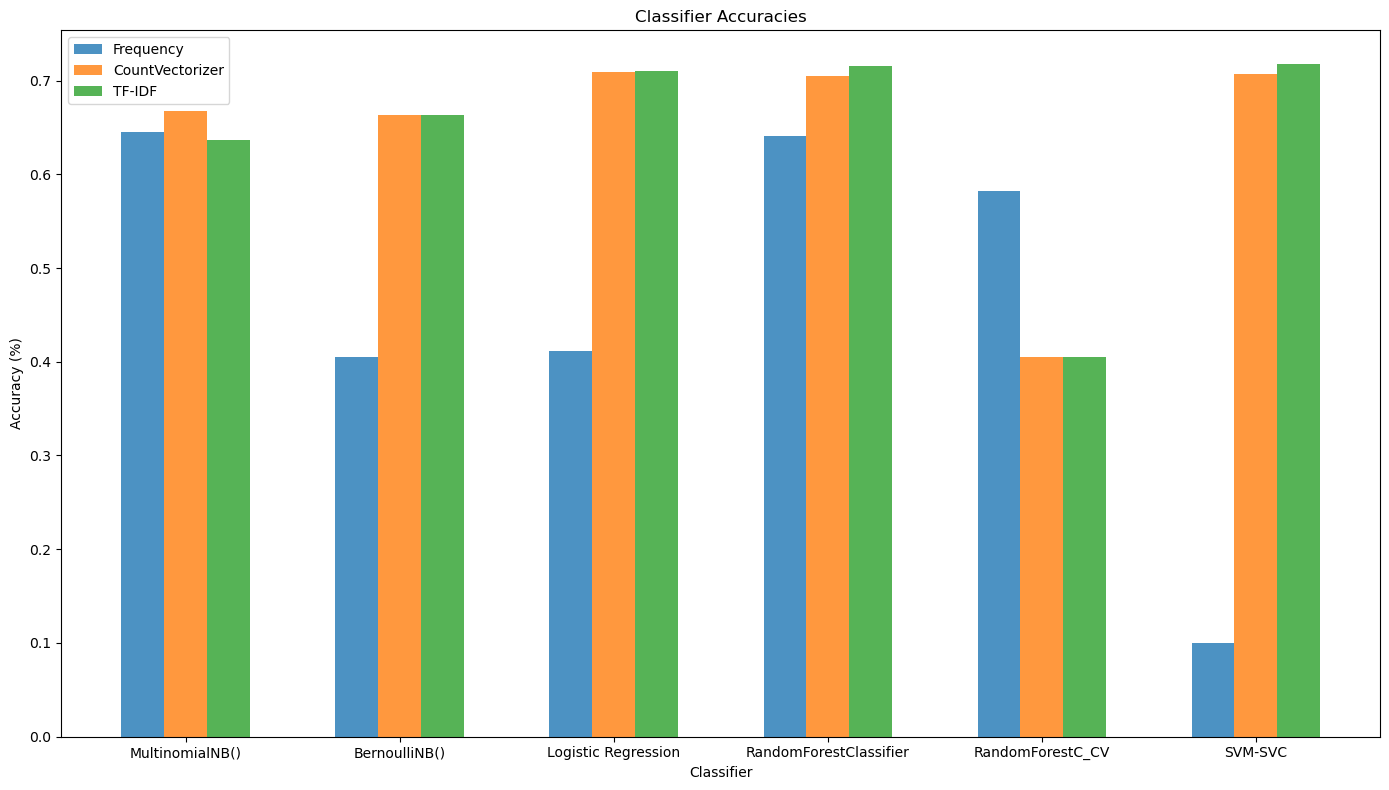

In [94]:

# Create a bar chart
fig, ax = plt.subplots(figsize=(14, 8))

bar_width = 0.2
opacity = 0.8

# Calculate the x-axis positions for the bars
x1 = [j for j in range(len(classifiers))]
x2 = [j + bar_width for j in range(len(classifiers))]
x3 = [j + 2 * bar_width for j in range(len(classifiers))]

# Plot the bars for each classifier with the corresponding accuracies
ax.bar(x1, frequency, bar_width,
       alpha=opacity,
       label='Frequency')
ax.bar(x2, count_vectorizer, bar_width,
       alpha=opacity,
       label='CountVectorizer')
ax.bar(x3, tf_idf, bar_width,
       alpha=opacity,
       label='TF-IDF')

ax.set_xlabel('Classifier')
ax.set_ylabel('Accuracy (%)')
ax.set_title('Classifier Accuracies')
ax.set_xticks([j + bar_width for j in range(len(classifiers))])
ax.set_xticklabels(classifiers)
ax.legend()

plt.tight_layout()
plt.show()


Grid Search CV for SVM

In [95]:
param_grid = {'C': [0.1, 1, 10], 
              'gamma': [1, 0.1, 0.01],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train_tf, Y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.530 total time= 1.1min
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.530 total time= 1.1min
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.528 total time= 1.1min
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.529 total time= 1.1min
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.533 total time= 1.1min
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.469 total time= 1.0min
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.469 total time= 1.2min
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.471 total time= 1.2min
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.468 total time= 1.1min
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.470 total time= 1.1min
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.405 total time= 1.2min
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;,

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01],
                         'kernel': ['rbf']},
             verbose=3)

In [96]:
def svm_c(X_train, Y_train,X_test,param_grid):
  grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3)
  # fitting the model for grid search
  grid.fit(X_train, Y_train)  
  grid_predictions = grid.predict(X_test)
  # print classification report
  print(classification_report(Y_test, grid_predictions))
  plot_confusion(confusion_matrix(Y_test, grid_predictions))
  # print best parameter after tuning
  print(grid.best_params_)
  # print how our model looks after hyper-parameter tuning
  print(grid.best_estimator_)
  print(Fore.GREEN + "SVM Model Accuracy: "+Style.RESET_ALL+" {:.2%}".format(accuracy_score(Y_test, grid_predictions)))
  return accuracy_score(Y_test, grid_predictions)


In [97]:
accuracy1=0.4

Count Vectorizer

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.420 total time= 1.8min
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.418 total time= 1.7min
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.420 total time= 1.8min
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.418 total time= 1.7min
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.419 total time= 2.1min
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.588 total time= 1.1min
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.593 total time= 1.1min
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.591 total time= 1.1min
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.584 total time= 1.0min
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.591 total time= 1.2min
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.485 total time=  52.7s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;,

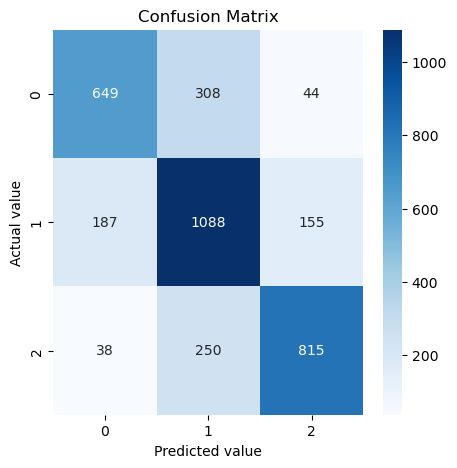

In [98]:
accuracy2=svm_c(X_train_cv, Y_train,X_test_cv,param_grid)

TF-IDF

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.530 total time= 1.1min
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.530 total time= 1.1min
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.528 total time= 1.1min
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.529 total time= 1.1min
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.533 total time=  57.3s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.469 total time=  54.6s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.469 total time=  52.4s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.471 total time=  52.3s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.468 total time=  53.8s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.470 total time=  54.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.405 total time= 1.3min
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;,

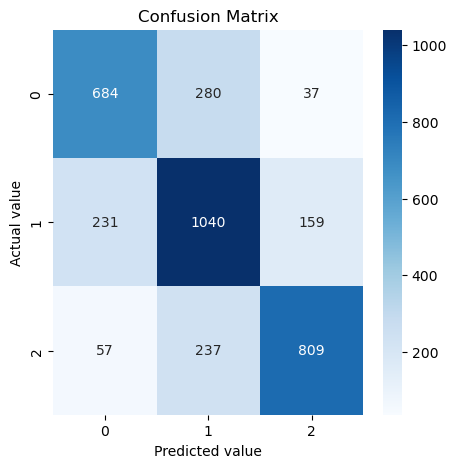

In [99]:
accuracy3=svm_c(X_train_tf, Y_train,X_test_tf,param_grid)


#### Prediction

In [109]:
predict_tweet(your_tweet,grid)

'Prediction is negative sentiment'

In [101]:
classifiers.append("SVM-SVC-CV")
frequency.append(accuracy1)
count_vectorizer.append(accuracy2)
tf_idf.append(accuracy3)

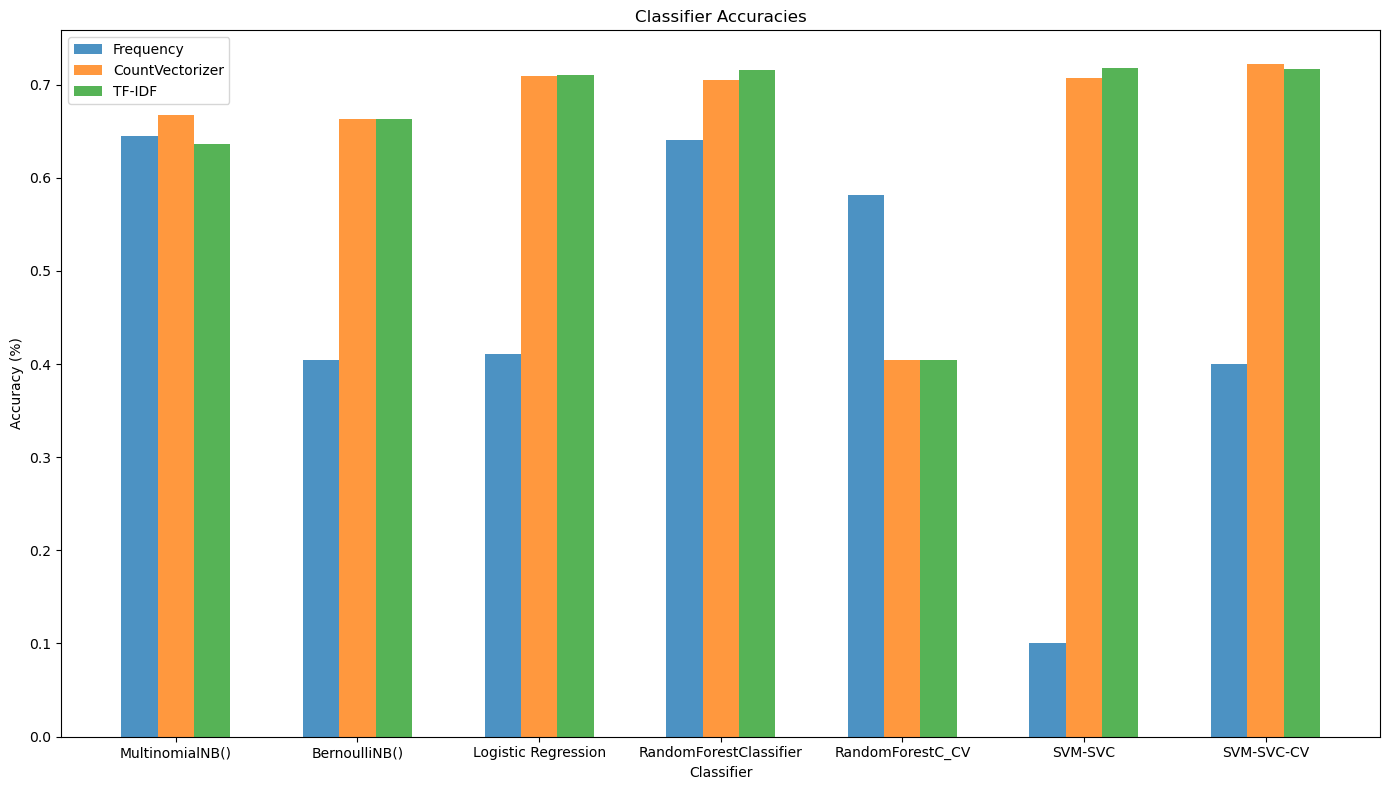

In [102]:

# Create a bar chart
fig, ax = plt.subplots(figsize=(14, 8))

bar_width = 0.2
opacity = 0.8

# Calculate the x-axis positions for the bars
x1 = [j for j in range(len(classifiers))]
x2 = [j + bar_width for j in range(len(classifiers))]
x3 = [j + 2 * bar_width for j in range(len(classifiers))]

# Plot the bars for each classifier with the corresponding accuracies
ax.bar(x1, frequency, bar_width,
       alpha=opacity,
       label='Frequency')
ax.bar(x2, count_vectorizer, bar_width,
       alpha=opacity,
       label='CountVectorizer')
ax.bar(x3, tf_idf, bar_width,
       alpha=opacity,
       label='TF-IDF')

ax.set_xlabel('Classifier')
ax.set_ylabel('Accuracy (%)')
ax.set_title('Classifier Accuracies')
ax.set_xticks([j + bar_width for j in range(len(classifiers))])
ax.set_xticklabels(classifiers)
ax.legend()

plt.tight_layout()
plt.show()


 > Considered the above classifiers, in most of the cases TF-IDf has more accuracy than count vectorizer and basic frequency of tweets.Moreover Support Vector Machine and Logistic Regression has better accuracy compared to other classifiers.Predicting the sentiment of given tweet.